In [51]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import bff
# import pingouin as pg
#import researchpy
# Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

In [52]:
df = pd.read_excel("data60.xlsx")
df

,ResponseId,Country,cond,condName,Intervention_order,Intro_Timer,Intervention_Timer,BELIEFcc,POLICYcc,SHAREcc,...,Trust_sci1_1.1,control_timer2_First Click,control_timer2_Last Click,control_timer2_Page Submit,control_timer2_Click Count,Trust_sci2_1.1,control_timer3_First Click,control_timer3_Last Click,control_timer3_Page Submit,control_timer3_Click Count
0,R_0031kFvKFnFD4E9,Israel,7,PsychDistance,SocialmediasharingPipedText|PolicySupport|Beli...,4.801,104.031,92.75,86.888889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R_0059fW1EtKYsTWV,Brazil,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,11.155,198.395,100.00,100.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R_00688n4RYG3zIel,Macedonia,10,DynamicNorm,SocialmediasharingPipedText|PolicySupport|Beli...,29.154,83.853,100.00,54.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R_0086kfWbVfurc1H,France,8,PluralIgnorance,PolicySupport|SocialmediasharingPipedText|Beli...,8.301,29.399,80.25,85.222222,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R_00B8XyVmrMofqGB,UK,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,17.951,148.918,51.00,48.777778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54653,R_zZMtNlzas0E8RyN,Slovakia,9,LetterFuture,BeliefinAnthrCC|PolicySupport|Socialmediashari...,31.481,316.675,98.50,91.333333,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54654,R_zZPllZfBJWjfSCZ,Switzerland,9,LetterFuture,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,5.627,206.393,63.00,47.444444,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54655,R_zZPOdDw0XWugcH7,Israel,10,DynamicNorm,PolicySupport|SocialmediasharingPipedText|Beli...,16.698,104.157,98.75,63.888889,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54656,R_zZpwx0yCZNh32ql,Algeria,10,DynamicNorm,BeliefinAnthrCC|PolicySupport|Socialmediashari...,17.577,79.966,13.75,25.750000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Global median split
# df["Ideology"] = (df["Politics2_1"] > df["Politics2_1"].median()).astype(int)

df['ide'] = (df['Politics2_1'] + df['Politics2_9'])/2
# Per-country median split
new = []
for _, sub in df.groupby("Country"):
    sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)
    # Ensure NaN ideology when Politics2_1 is NaN
    sub.loc[sub.Politics2_1.isna(), "Ideology"] = np.NaN
    new.append(sub)
df = pd.concat(new)
# Replace 1 with "Conservative" and 0 with "Liberal"
df['Ideology'] = df['Ideology'].replace(1, 'Conservative').replace(0, 'Liberal')
df_control = df.query('cond==1')
df_control

/var/folders/_k/7pcq4lm56wv8f7559x3jslj40000gn/T/ipykernel_1578/4253897449.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)


,ResponseId,Country,cond,condName,Intervention_order,Intro_Timer,Intervention_Timer,BELIEFcc,POLICYcc,SHAREcc,...,control_timer2_Last Click,control_timer2_Page Submit,control_timer2_Click Count,Trust_sci2_1.1,control_timer3_First Click,control_timer3_Last Click,control_timer3_Page Submit,control_timer3_Click Count,ide,Ideology
645,R_10Dy5kIdZiCS1Hh,Algeria,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,40.999,59.713,12.00,63.250000,1.0,...,3.805,4.549,1.0,NaN,1.605,1.605,2.483,1.0,NaN,NaN
1360,R_12eZDYyqMuHMs40,Algeria,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,12.364,14.505,51.50,53.333333,1.0,...,10.006,11.091,1.0,75.0,4.070,6.658,6.997,2.0,54.0,Liberal
2734,R_1DLU6t5YiTJMs5O,Algeria,1,Control,SocialmediasharingPipedText|PolicySupport|Beli...,33.215,47.178,88.00,88.444444,1.0,...,9.255,11.013,1.0,75.0,4.098,4.098,5.952,1.0,80.5,Conservative
4418,R_1FySakGF115qvHJ,Algeria,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,19.056,62.049,93.00,64.375000,NaN,...,8.185,9.516,1.0,89.0,6.895,6.895,8.134,1.0,54.0,Liberal
4977,R_1GP0L143l7yV8M1,Algeria,1,Control,PolicySupport|SocialmediasharingPipedText|Beli...,22.657,13.431,78.50,61.111111,NaN,...,7.725,12.936,1.0,55.0,8.465,23.236,24.414,4.0,56.0,Liberal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47893,R_pz6jT5cZRhgCzXX,Vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,5.269,90.318,99.25,78.444444,0.0,...,0.401,1.269,1.0,100.0,0.460,0.460,1.110,1.0,64.5,Conservative
49030,R_Rqom9DZcYCveM49,Vietnam,1,Control,SocialmediasharingPipedText|PolicySupport|Beli...,4.965,14.087,62.50,71.800000,1.0,...,1.935,2.194,1.0,58.0,0.564,0.564,1.025,1.0,51.0,Liberal
49485,R_SGM7rpBsClZHZ4Z,Vietnam,1,Control,SocialmediasharingPipedText|PolicySupport|Beli...,18.389,130.794,80.75,60.444444,0.0,...,4.900,6.170,1.0,NaN,2.725,2.725,3.298,1.0,NaN,NaN
53445,R_Y5BtwTC9yOO8Rxf,Vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,9.971,14.939,68.00,60.444444,1.0,...,4.201,5.005,3.0,79.0,1.404,2.404,3.295,2.0,50.0,Liberal


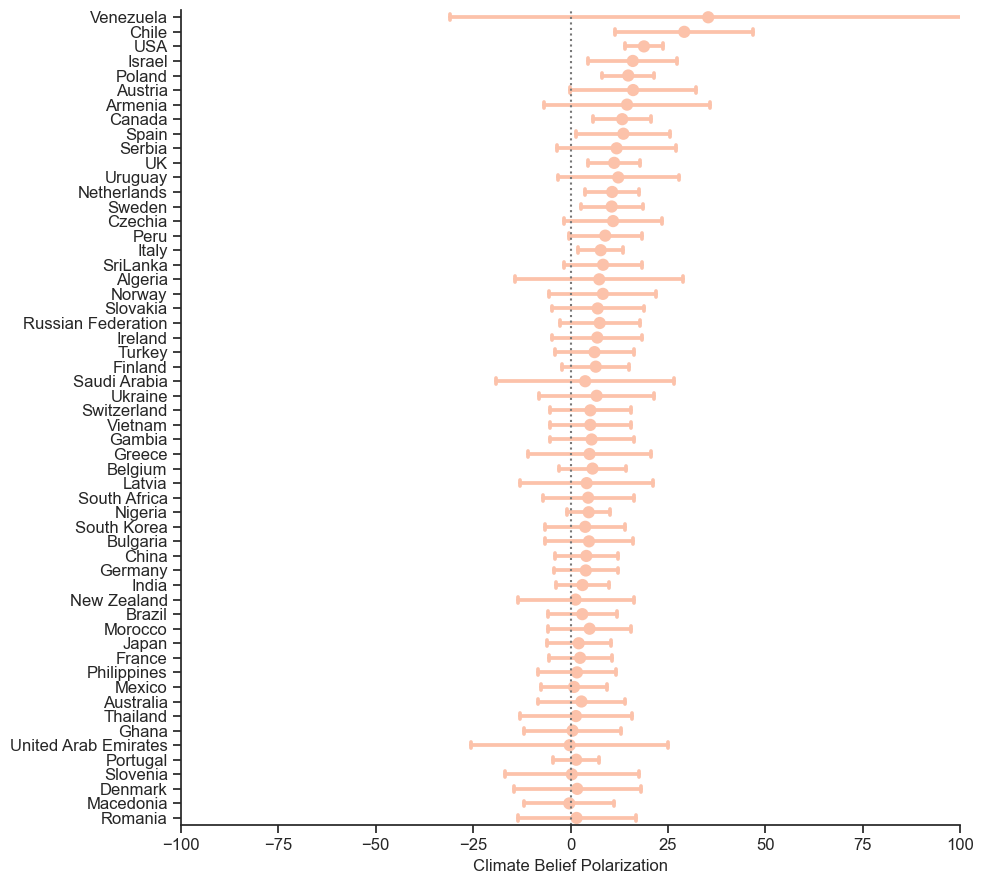

In [67]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["BELIEFcc"].mean())
        var.append(subgroup["BELIEFcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "BELIEFcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="BELIEFcc", ascending=False)
dfdiff["absdifference"] = dfdiff["BELIEFcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#FCC2AA"]
fig, ax = plt.subplots(1,1, figsize=(10,9))
dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Climate Belief Polarization")
plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('belief_polarization.png', dpi=500, format="png")

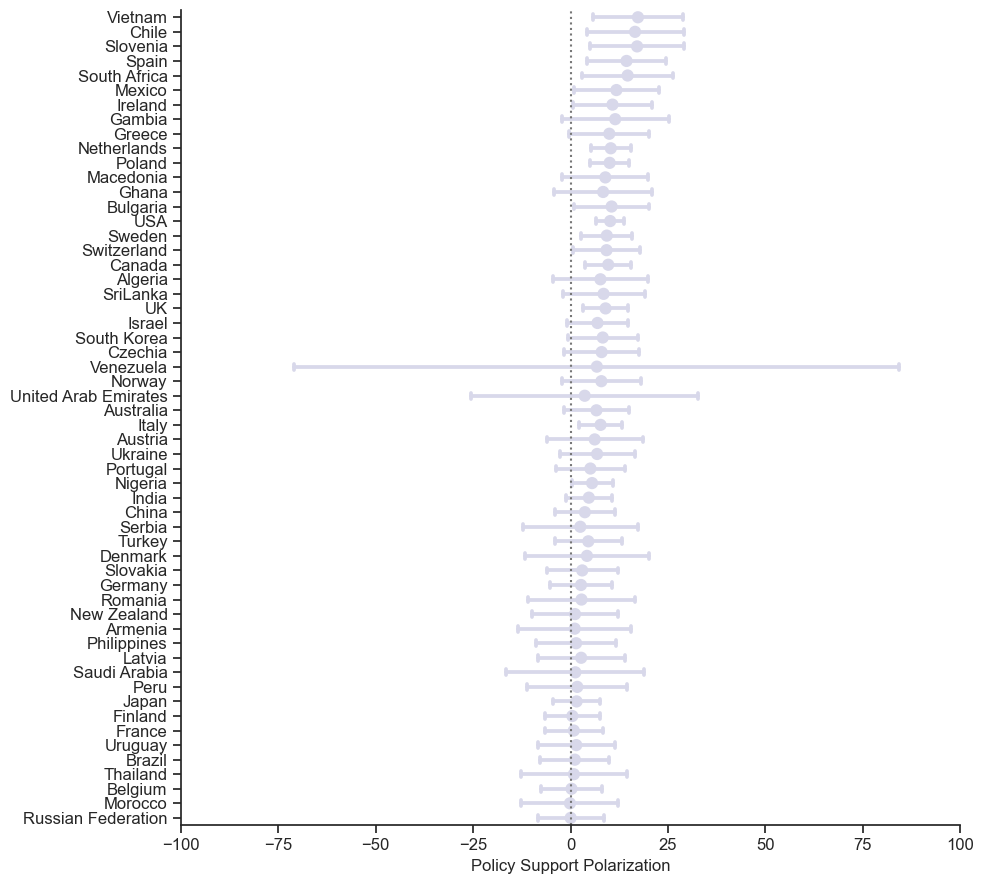

In [60]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["POLICYcc"].mean())
        var.append(subgroup["POLICYcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "POLICYcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="POLICYcc", ascending=False)
dfdiff["absdifference"] = dfdiff["POLICYcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)


pal = ["#D8D8EA"]
fig, ax = plt.subplots(1,1, figsize=(10,9))
dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Policy Support Polarization")
plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('policy_polarization.png', dpi=500, format="png")

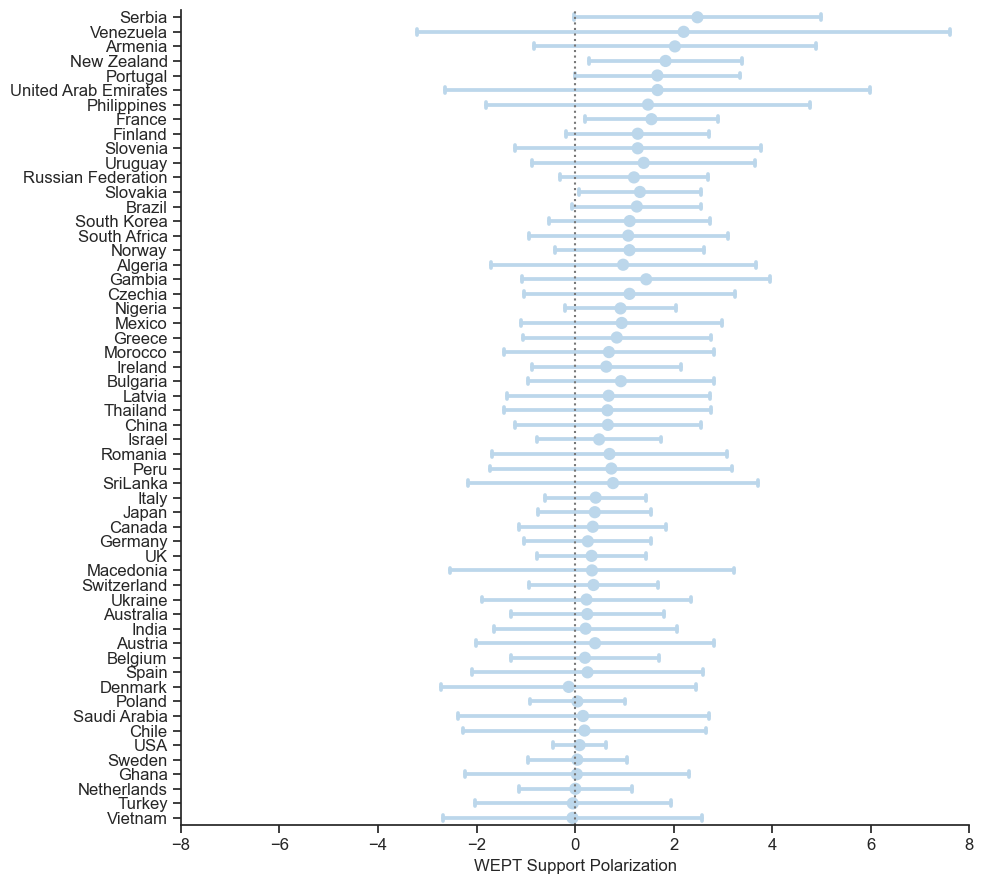

In [65]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["WEPTcc"].mean())
        var.append(subgroup["WEPTcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "WEPTcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="WEPTcc", ascending=False)
dfdiff["absdifference"] = dfdiff["WEPTcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)


pal = ["#BCD7EB"]
fig, ax = plt.subplots(1,1, figsize=(10,9))
dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("WEPT Support Polarization")
plt.xlim(-8,8)
plt.tight_layout()
plt.savefig('action_polarization.png', dpi=500, format="png")

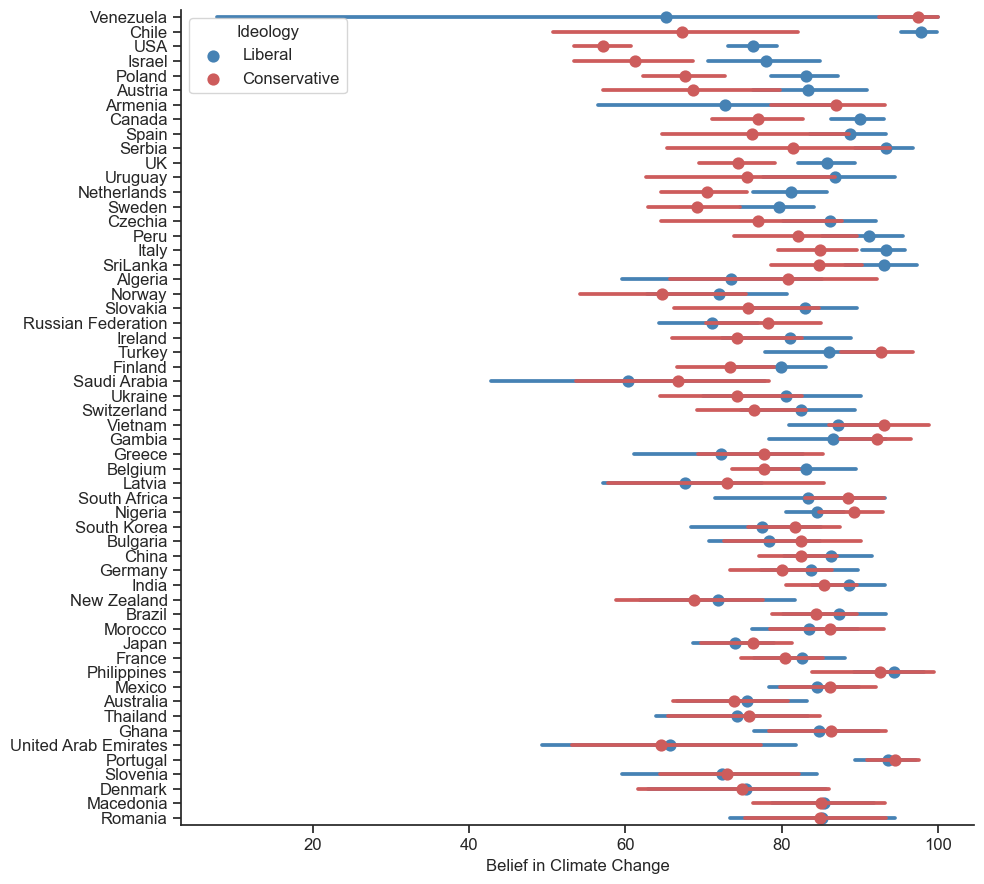

In [89]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["BELIEFcc"].mean())
        var.append(subgroup["BELIEFcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "BELIEFcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="BELIEFcc", ascending=False)
dfdiff["absdifference"] = dfdiff["BELIEFcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,1, figsize=(10,9), sharey=True)
order = dfdiff.sort_values(by=['absdifference'], ascending=False).Country.tolist()

sns.pointplot(y=df_control.Country, x=df_control.BELIEFcc, hue=df_control.Ideology, data=df_control, orient="h", \
            palette = pal, join=False, order=order, \
            ax=ax)
sns.despine()
ax.set_ylabel("")
ax.set_xlabel("Belief in Climate Change")
plt.tight_layout()
plt.savefig('belief_polarization_byIde.png', dpi=500, format="png")

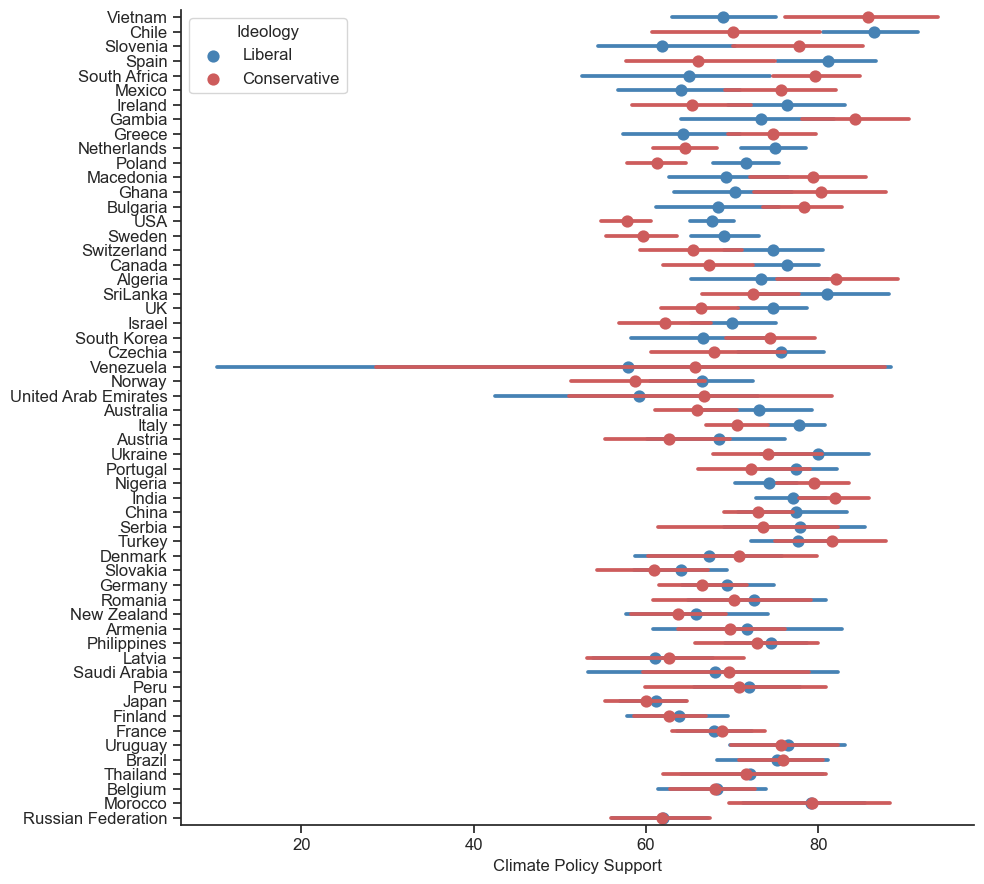

In [90]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["POLICYcc"].mean())
        var.append(subgroup["POLICYcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "POLICYcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="POLICYcc", ascending=False)
dfdiff["absdifference"] = dfdiff["POLICYcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,1, figsize=(10,9), sharey=True)
order = dfdiff.sort_values(by=['absdifference'], ascending=False).Country.tolist()

sns.pointplot(y=df_control.Country, x=df_control.POLICYcc, hue=df_control.Ideology, data=df_control, orient="h", \
            palette = pal, join=False, order=order, \
            ax=ax)
sns.despine()
ax.set_ylabel("")
ax.set_xlabel("Climate Policy Support")
plt.tight_layout()
plt.savefig('policy_polarization_byIde.png', dpi=500, format="png")

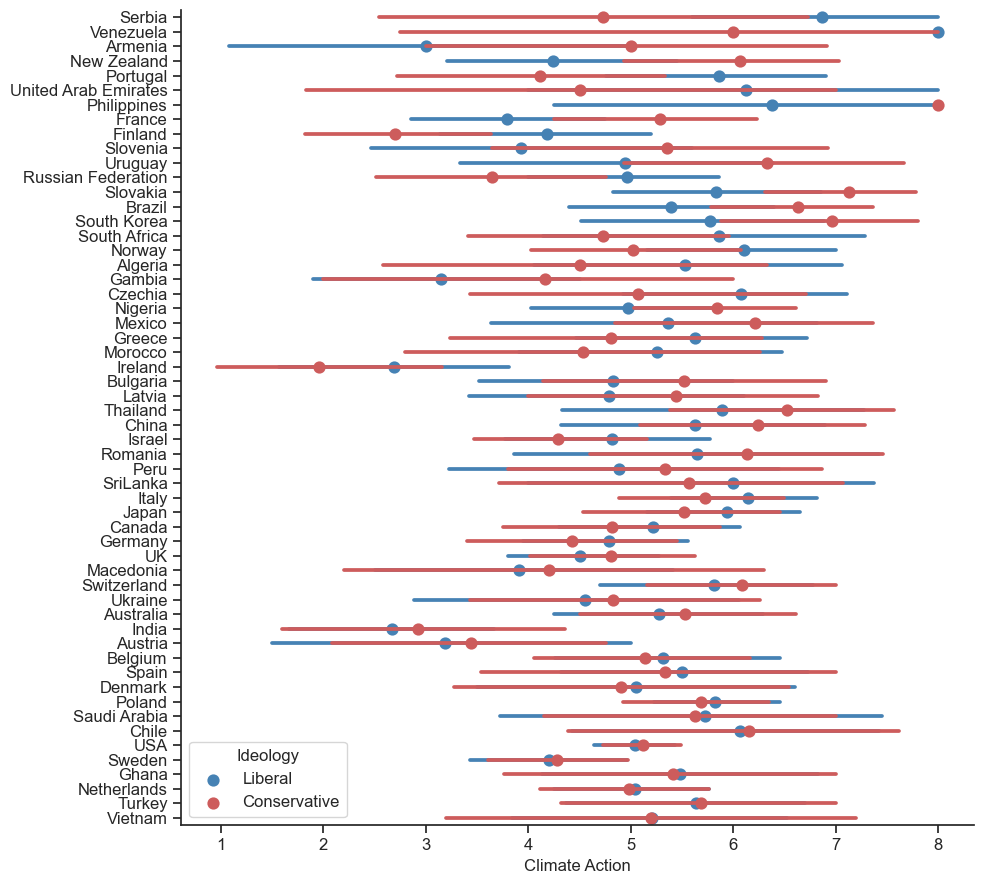

In [91]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["WEPTcc"].mean())
        var.append(subgroup["WEPTcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "WEPTcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="WEPTcc", ascending=False)
dfdiff["absdifference"] = dfdiff["WEPTcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,1, figsize=(10,9), sharey=True)
order = dfdiff.sort_values(by=['absdifference'], ascending=False).Country.tolist()

sns.pointplot(y=df_control.Country, x=df_control.WEPTcc, hue=df_control.Ideology, data=df_control, orient="h", \
            palette = pal, join=False, order=order, \
            ax=ax)
sns.despine()
ax.set_ylabel("")
ax.set_xlabel("Climate Action")
plt.tight_layout()
plt.savefig('action_polarization_byIde.png', dpi=500, format="png")